## 1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces. And then accuracy by adding the High Priority

In [29]:
!pip install mysql-connector-python scikit-learn pandas matplotlib seaborn --quiet


In [30]:

import mysql.connector
import pandas as pd

# Connect to MySQL
conn = mysql.connector.connect(
    host="18.136.157.135",
    user="dm_team",
    password="DM!$Team@&27920!",
    database="project_itsm"
)

# Load data - change table name as needed
query = "SELECT * FROM project_itsm.dataset_list;"  # Replace with actual table name if different
df = pd.read_sql(query, conn)
df.head()


C:\Users\Sai Kishore\AppData\Local\Temp\ipykernel_13300\2023574328.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [31]:
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


In [32]:
df.isnull().sum()

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Reopen_Time                   0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
No_of_Related_Incidents       0
No_of_Related_Changes         0
Related_Change                0
dtype: int64

In [33]:

# 4. Convert Priority into binary target
df['High_Priority'] = df['Priority'].apply(lambda x: 1 if str(x).strip() in ['1', '2', 'P1', 'P2'] else 0)

from sklearn.preprocessing import LabelEncoder

# 6. Identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 7. Apply Label Encoding (or One-Hot if small cardinality)
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# 8. Split into X and y
x = df.drop(columns=['High_Priority'])
y = df['High_Priority']


In [34]:
for col in ['Open_Time', 'Resolved_Time', 'Close_Time']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
df['High_Priority'].value_counts()


High_Priority
0    45906
1      700
Name: count, dtype: int64

In [37]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split your data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.replace('NS', np.nan, inplace=True)
# Apply SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)



# Train model
model = RandomForestClassifier(random_state=42)
model.fit(x_resampled, y_resampled)

# Predict and evaluate
y_pred = model.predict(x_train)
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36727
           1       1.00      1.00      1.00       557

    accuracy                           1.00     37284
   macro avg       1.00      1.00      1.00     37284
weighted avg       1.00      1.00      1.00     37284



##  2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

### ✅ 2. Forecast Incident Volume (Quarterly & Annually)

🎯 Goal: Predict how many tickets will be raised in future quarters or years to plan staff/resources.
🔍 Step-by-step:
1.	Extract Date Features:
o	Use the Open_Time column to extract year, month, quarter.
2.	Aggregate:
o	Count incidents per month/quarter/year.
3.	Visualize Trends:
o	Line chart or bar chart to spot seasonality or spikes.
4.	Model Selection:
o	Use Time Series models (ARIMA, Prophet) or Regression models.
5.	Train Model:
o	Use past data (e.g., 2012–2014) to predict the next 5 years.
6.	Forecast:
o	Get predicted ticket volumes for future quarters and years.
7.	Plan:
o	Share insights with ops team for staffing and system scaling.


C:\ProgramData\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


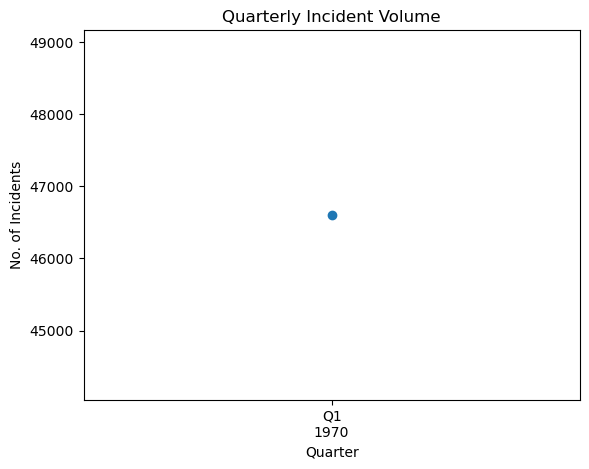

2015-01-01    2200.411230
2015-04-01    2378.195617
2015-07-01    2278.358569
2015-10-01    2334.423313
2016-01-01    2302.939454
2016-04-01    2320.619609
2016-07-01    2310.691097
2016-10-01    2316.266577
2017-01-01    2313.135596
2017-04-01    2314.893838
2017-07-01    2313.906475
2017-10-01    2314.460941
2018-01-01    2314.149574
2018-04-01    2314.324426
2018-07-01    2314.226236
2018-10-01    2314.281376
Freq: QS-OCT, Name: predicted_mean, dtype: float64


In [38]:
# ARIMA
import matplotlib.pyplot as plt


# 1. Convert 'Open_Time' to datetime
df['Open_Time'] = pd.to_datetime(df['Open_Time'], errors='coerce')

# 2. Create 'Quarter' and 'Year' columns
df['Quarter'] = df['Open_Time'].dt.to_period('Q')
df['Year'] = df['Open_Time'].dt.year

# 3. Count incidents per quarter/year
quarterly_incidents = df.groupby('Quarter')['Incident_ID'].count()
yearly_incidents = df.groupby('Year')['Incident_ID'].count()

# 4. Plot trends
quarterly_incidents.plot(title='Quarterly Incident Volume', marker='o')
plt.ylabel('No. of Incidents')
plt.show()




# Forecast next 8 quarters
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()
forecast_problems = model_fit.forecast(steps=16)
print(forecast_problems)




##  3. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced. 

In [39]:
# IT IS PREPARING THE ML MODEL BY ITS PRIORITY THE EMPLOYEE PROBLEM WAS

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib # Import joblib

# Step 2: Sample ticket data
data = pd.DataFrame({
    'Description': [
        'CI subapplication has performance issues',
        'WBS application crashed during login',
        'Web-based app access failure reported',
        'CI category module is very slow',
        'WBS000162 resource not loading',
        'Reassignments too many and delay high',
        'Impact and Urgency are both critical',
        'Related to change C00000056 reported issue',
        'Access denied to SUB000508',
        'Unstable response from SD0000007 interaction'
    ],
    'Priority': [1, 2, 3, 2, 2, 3, 1, 2, 3, 4],
    'Department': [
        'Sub Application Team', 'WBS Support', 'Web Support', 'CI Team',
        'WBS Support', 'Service Desk', 'Operations', 'Change Mgmt',
        'Access Control', 'Interaction Support'
    ]
})

# Step 3: Label encoding targets
priority_encoder = LabelEncoder()
dept_encoder = LabelEncoder()
data['Priority_encoded'] = priority_encoder.fit_transform(data['Priority'])
data['Dept_encoded'] = dept_encoder.fit_transform(data['Department'])

# Step 4: Text vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['Description'])

# Step 5: Train ML model for Priority
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, data['Priority_encoded'], test_size=0.2, random_state=42)
model_priority = RandomForestClassifier()
model_priority.fit(X_train_p, y_train_p)

# Step 6: Train ML model for Department
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, data['Dept_encoded'], test_size=0.2, random_state=42)
model_dept = RandomForestClassifier()
model_dept.fit(X_train_d, y_train_d)

# Save the trained vectorizer and models
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(model_priority, 'priority_model.pkl')
joblib.dump(model_dept, 'department_model.pkl')

print("Vectorizer and models trained and saved.")


# Step 7: Predict on new ticket
sample_ticket = ["WBS application slow response and access issues"]
sample_vector = tfidf.transform(sample_ticket)

predicted_priority = priority_encoder.inverse_transform(model_priority.predict(sample_vector))[0]
predicted_department = dept_encoder.inverse_transform(model_dept.predict(sample_vector))[0]

print("Predicted Priority:", predicted_priority)
print("Predicted Department:", predicted_department)


Vectorizer and models trained and saved.
Predicted Priority: 1
Predicted Department: Interaction Support


## 4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.




In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np  # Import numpy for NaN

# Assuming df is your cleaned ITSM DataFrame

# Convert problematic columns to numeric, replacing empty strings, 'NS', and other errors with NaN
for col in ['No_of_Related_Incidents', 'No_of_Related_Changes', 'Priority', 'Impact', 'Urgency']:
    if col in df.columns:
        # Replace empty strings and 'NS' with NaN first
        df[col] = df[col].replace(['', 'NS'], np.nan)
        # Convert to numeric, coercing any other errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaN values in the features
for col in ['No_of_Related_Incidents', 'No_of_Related_Changes', 'Priority', 'Impact', 'Urgency']:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)  # ✅ Assign back to the DataFrame (avoids chained assignment warning)

# Create the target variable
df['RFC_Failure'] = df['No_of_Related_Incidents'].apply(lambda x: 1 if x > 2 else 0)

# Select features and target
features = ['No_of_Related_Incidents', 'No_of_Related_Changes', 'Priority', 'Impact', 'Urgency']
X = df[features]
y = df['RFC_Failure']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f"RFC Failure Prediction Accuracy: {accuracy:.2f}")


RFC Failure Prediction Accuracy: 1.00
